In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [6]:
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head(5)

Saving data.csv to data (1).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.shape

(569, 33)

In [8]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
df = df.dropna(axis=1)
df.shape

(569, 32)

In [10]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

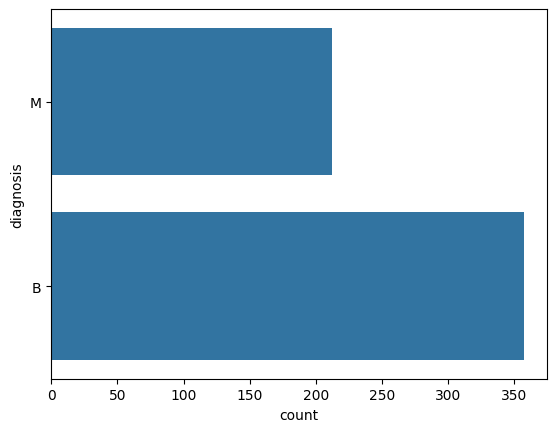

In [11]:
sns.countplot(df['diagnosis'], label='count')
plt.show()

In [12]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:, 1] = labelencoder_Y.fit_transform(df.iloc[:, 1].values)

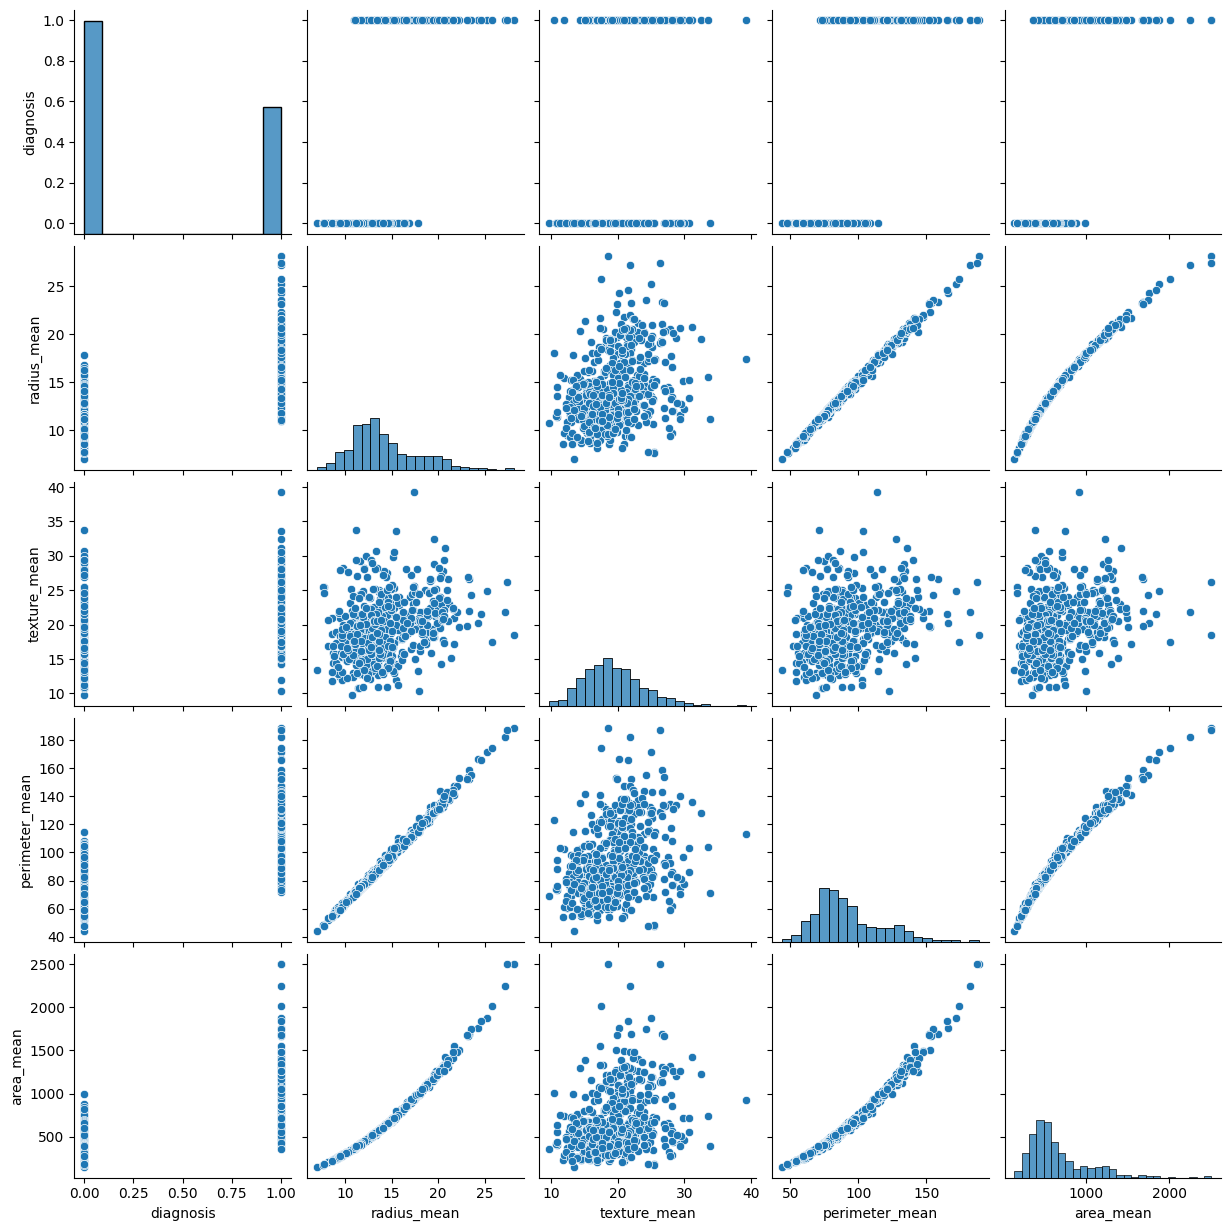

In [14]:
sns.pairplot(df.iloc[:, 1:6])
plt.show()

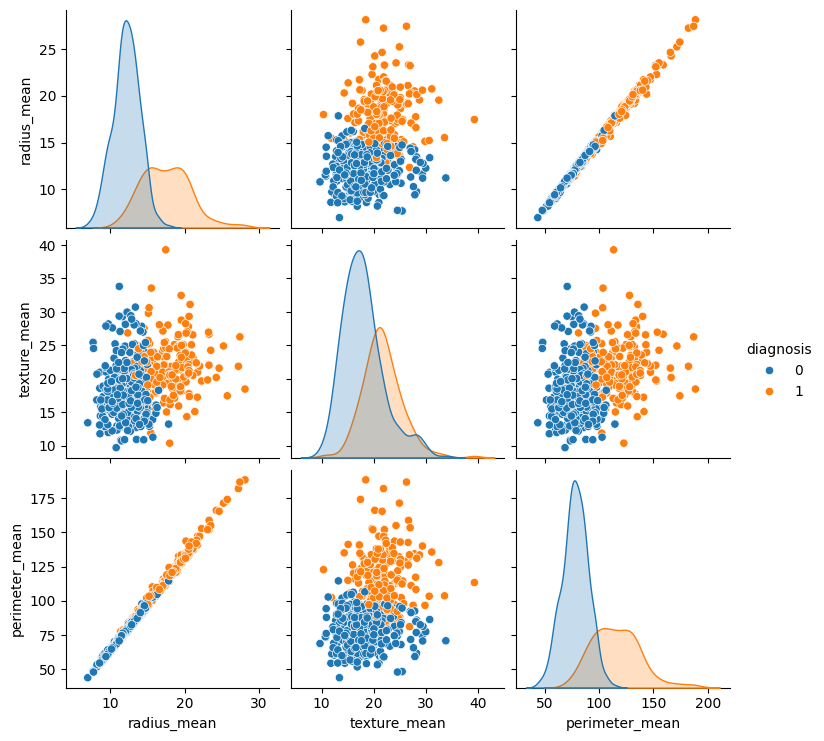

In [15]:
sns.pairplot(df.iloc[:, 1:5], hue='diagnosis')
plt.show()

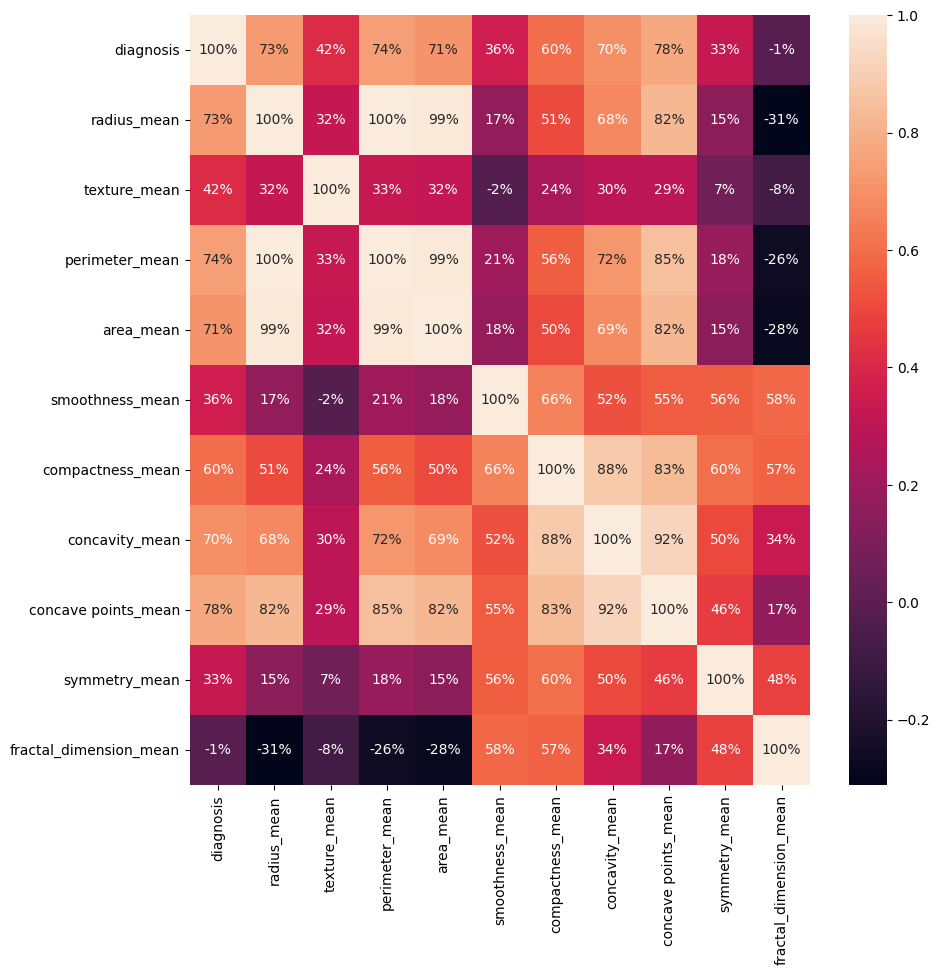

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.iloc[:, 1:12].corr(), annot=True, fmt='.0%')
plt.show()

In [17]:
X = df.iloc[:, 2:31].values
Y = df.iloc[:, 1].values
print(type(Y))


<class 'numpy.ndarray'>


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)
print(f"Type of Y_test: {type(Y_test)}")


Type of Y_test: <class 'numpy.ndarray'>


In [19]:
Y_train = Y_train.astype('int')
print(Y_train.dtype)


int64


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
def models(X_train, Y_train):
    # Check if the target variable is numerical
    if not np.issubdtype(Y_train.dtype, np.number):
        raise ValueError("Y_train contains non-numerical values. Please ensure consistent types.")

    # Logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)

    # Decision tree method
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, Y_train)

    # Random forest classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)

    # Print the models' accuracy
    print('[0] Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1] Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[2] Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

    return log, tree, forest


In [22]:
model = models(X_train, Y_train)

[0] Logistic Regression Training Accuracy: 0.9906103286384976
[1] Decision Tree Classifier Training Accuracy: 1.0
[2] Random Forest Classifier Training Accuracy: 0.9906103286384976


In [23]:
predictions = model[0].predict(X_test)
print(f"Type of predictions: {type(predictions)}")
print(f"First few elements of predictions: {predictions[:10]}")

Type of predictions: <class 'numpy.ndarray'>
First few elements of predictions: [0 0 0 1 0 1 0 0 0 0]


In [24]:
if Y_test.dtype != predictions.dtype:
    Y_test = Y_test.astype(predictions.dtype)


In [25]:
print(f"Any NaN in Y_test: {np.any(np.isnan(Y_test))}")
print(f"Any None in Y_test: {np.any(Y_test == None)}")
print(f"Any NaN in predictions: {np.any(np.isnan(predictions))}")
print(f"Any None in predictions: {np.any(predictions == None)}")

Any NaN in Y_test: False
Any None in Y_test: False
Any NaN in predictions: False
Any None in predictions: False


In [26]:
print(f"Unique values in Y_test: {set(Y_test)}")
print(f"Unique values in predictions: {set(predictions)}")

Unique values in Y_test: {0, 1}
Unique values in predictions: {0, 1}


In [32]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  print("Model",i)

  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print("testing accuracy =" ,(TP+TN)/(TP+TN+FN+FP))
  print()


Model 0
[[85  2]
 [ 1 55]]
testing accuracy = 0.9790209790209791

Model 1
[[79  8]
 [ 3 53]]
testing accuracy = 0.9230769230769231

Model 2
[[82  5]
 [ 5 51]]
testing accuracy = 0.9300699300699301



In [35]:
# this another way of getting metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
  print("Model",i)

  print(classification_report(Y_test,model[i].predict(X_test)))
  print(accuracy_score(Y_test,model[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        87
           1       0.96      0.98      0.97        56

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9790209790209791

Model 1
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        87
           1       0.87      0.95      0.91        56

    accuracy                           0.92       143
   macro avg       0.92      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143

0.9230769230769231

Model 2
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        87
           1       0.91      0.91      0.91        56

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted a

In [36]:
#print the predictions of the Random Forest Classifier
pred = model[2].predict(X_test)
print(pred) #this will print the prediction made on the test data
print()
print(Y_test)  # this will print the actual or original data(diagnosis)


[0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0]

[0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0]
